##**PASSO 1**

Qual problema deve ser resolvido?

Hoje em dia, m

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier


**Importação do Dataset**

Optei por usar a forma de importar direto do github, dessa maneira não haverá erro (por conta do diretório) na hora de executar em um outro notebook ou PC , uma vez que a informação se encontra na internet.

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/ThiagoDev00/House-Data/main/kc-house-data.csv', sep = ',')

Dropei do dataset o ID, por que era irrelevante para nossa IA.

In [ ]:
dataset.drop(['id'], axis=1, inplace = True)
dataset.drop(['date'], axis=1, inplace = True)

Renomeei para nomes que fiquem de melhor compreensão

In [ ]:
dataset.columns = 'Preço','Quartos','Banheiros','m² de vida','m² de lote','pisos','Beira Mar','Vista','Condição','Avaliação','m² acima','m² de porão','Ano de Construção','Ano de Renovação','Código Postal','latitude','longitude','m² de vida/2015','m² de lote/2015'

##Explorando o Dataset

In [ ]:
dataset.head(20)

,Preço,Quartos,Banheiros,m² de vida,m² de lote,pisos,Beira Mar,Vista,Condição,Avaliação,m² acima,m² de porão,Ano de Construção,Ano de Renovação,Código Postal,latitude,longitude,m² de vida/2015,m² de lote/2015
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Preço              21613 non-null  float64
 1   Quartos            21613 non-null  int64  
 2   Banheiros          21613 non-null  float64
 3   m² de vida         21613 non-null  int64  
 4   m² de lote         21613 non-null  int64  
 5   pisos              21613 non-null  float64
 6   Beira Mar          21613 non-null  int64  
 7   Vista              21613 non-null  int64  
 8   Condição           21613 non-null  int64  
 9   Avaliação          21613 non-null  int64  
 10  m² acima           21613 non-null  int64  
 11  m² de porão        21613 non-null  int64  
 12  Ano de Construção  21613 non-null  int64  
 13  Ano de Renovação   21613 non-null  int64  
 14  Código Postal      21613 non-null  int64  
 15  latitude           21613 non-null  float64
 16  longitude          216

In [ ]:
dataset.tail(11)

,Preço,Quartos,Banheiros,m² de vida,m² de lote,pisos,Beira Mar,Vista,Condição,Avaliação,m² acima,m² de porão,Ano de Construção,Ano de Renovação,Código Postal,latitude,longitude,m² de vida/2015,m² de lote/2015
21602,224000.0,3,1.75,1500,11968,1.0,0,0,3,6,1500,0,2014,0,98010,47.3095,-122.002,1320,11303
21603,507250.0,3,2.50,2270,5536,2.0,0,0,3,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
print('Soma dos Nulos')
dataset.isnull().sum()


Soma dos Nulos


Preço                0
Quartos              0
Banheiros            0
m² de vida           0
m² de lote           0
pisos                0
Beira Mar            0
Vista                0
Condição             0
Avaliação            0
m² acima             0
m² de porão          0
Ano de Construção    0
Ano de Renovação     0
Código Postal        0
latitude             0
longitude            0
m² de vida/2015      0
m² de lote/2015      0
dtype: int64

In [ ]:
print('Soma dos valores ausentes')
dataset.isna().sum()

Soma dos valores ausentes


Preço                0
Quartos              0
Banheiros            0
m² de vida           0
m² de lote           0
pisos                0
Beira Mar            0
Vista                0
Condição             0
Avaliação            0
m² acima             0
m² de porão          0
Ano de Construção    0
Ano de Renovação     0
Código Postal        0
latitude             0
longitude            0
m² de vida/2015      0
m² de lote/2015      0
dtype: int64

In [ ]:
dataset.describe()

,Preço,Quartos,Banheiros,m² de vida,m² de lote,pisos,Beira Mar,Vista,Condição,Avaliação,m² acima,m² de porão,Ano de Construção,Ano de Renovação,Código Postal,latitude,longitude,m² de vida/2015,m² de lote/2015
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
dataset_novo = dataset[['Quartos',	'Banheiros',	'm² de vida',	'm² de lote',	'pisos',	'Beira Mar',	'Vista',	'Condição',	'Avaliação',	'm² acima',	'm² de porão',	'Ano de Construção',	'Ano de Renovação',	'Código Postal',	'latitude',	'longitude', 'm² de vida/2015',	'm² de lote/2015','Preço'	]]

Aqui estamos pegando uma pequena amostra do dataset, um dataset com mais 21000 dados demoraria MUITO para fazer um treinamento, mas o que importa é mostrar funcionando.

In [ ]:
dataset_novo_1 = dataset_novo[0:2000]

##GRÁFICOS

A seguir Temos a quantidades de avalições recebida pela casas.

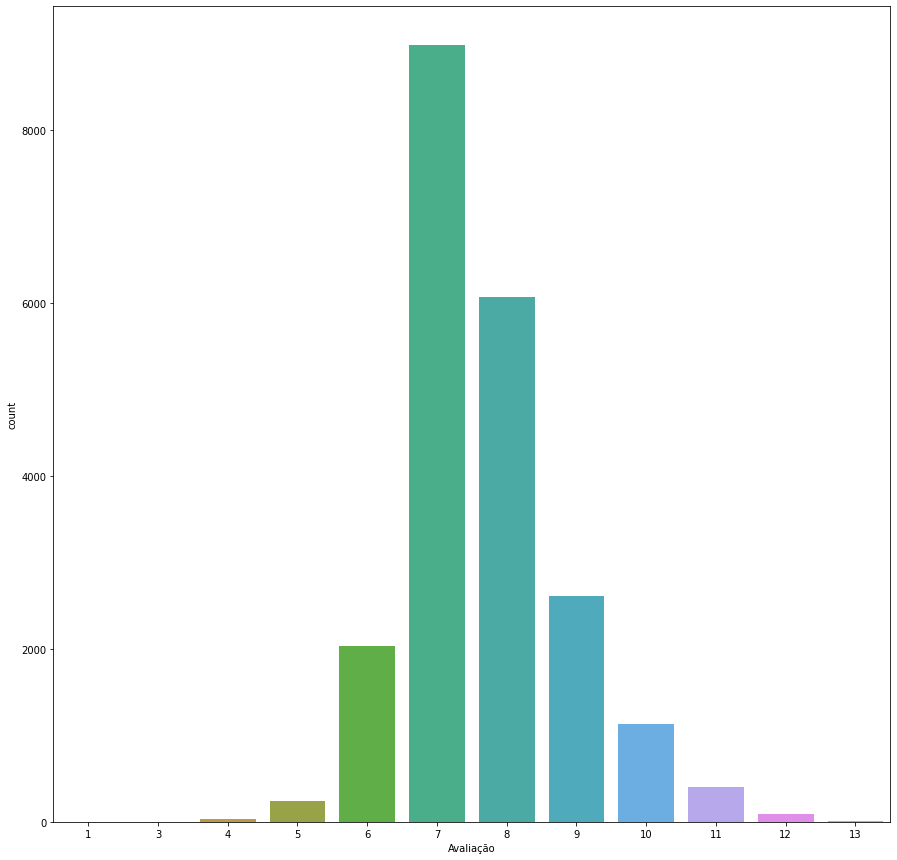

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(x = 'Avaliação', data=dataset);

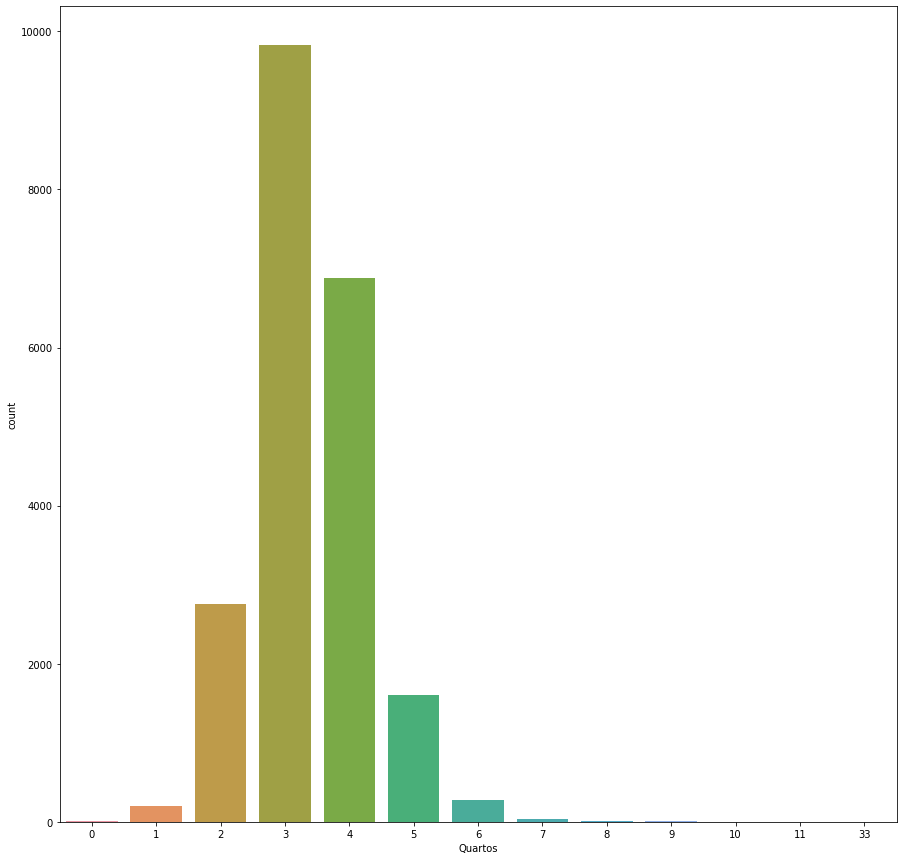

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(x = 'Quartos', data=dataset);

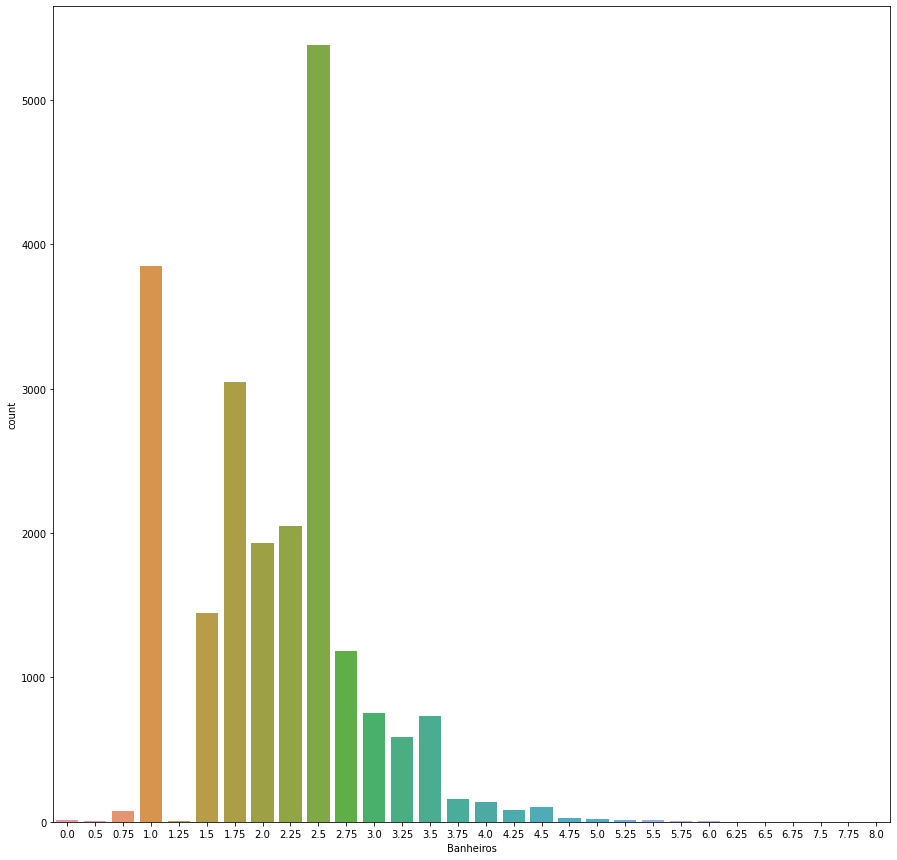

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(x = 'Banheiros', data=dataset);

In [ ]:
#plt.figure(figsize=(500,15))
#sns.lineplot(y = 'Avaliação', x = 'Preço', data=dataset);

In [ ]:
x = dataset_novo_1.iloc[:,1:19]

In [ ]:
x.sum()

Banheiros            4.147000e+03
m² de vida           4.148717e+06
m² de lote           3.076995e+07
pisos                2.875500e+03
Beira Mar            2.100000e+01
Vista                5.030000e+02
Condição             6.925000e+03
Avaliação            1.522700e+04
m² acima             3.539940e+06
m² de porão          6.087770e+05
Ano de Construção    3.936585e+06
Ano de Renovação     1.815530e+05
Código Postal        1.961535e+08
latitude             9.511246e+04
longitude           -2.444222e+05
m² de vida/2015      3.979344e+06
m² de lote/2015      2.722585e+07
Preço                1.062091e+09
dtype: float64

In [ ]:
x

,Banheiros,m² de vida,m² de lote,pisos,Beira Mar,Vista,Condição,Avaliação,m² acima,m² de porão,Ano de Construção,Ano de Renovação,Código Postal,latitude,longitude,m² de vida/2015,m² de lote/2015,Preço
0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.75,1890,13860,1.0,0,0,5,7,1890,0,1966,0,98042,47.4156,-122.149,1500,14536,307000.0
1996,1.50,1010,5000,1.0,0,0,3,6,1010,0,1943,0,98178,47.4925,-122.278,980,5000,194000.0
1997,1.00,1010,8581,1.0,0,0,4,6,1010,0,1920,0,98002,47.3043,-122.216,1060,10354,180000.0
1998,2.25,2340,13383,1.0,0,0,3,8,1170,1170,1983,0,98074,47.6211,-122.037,1810,12532,465000.0


In [ ]:
y = dataset_novo_1.iloc[:,0]

In [ ]:
y

0       3
1       3
2       2
3       4
4       3
       ..
1995    3
1996    3
1997    3
1998    4
1999    4
Name: Quartos, Length: 2000, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

scaler_dataset = StandardScaler()
x_norm = scaler_dataset.fit_transform(x)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.20, random_state=1)

In [ ]:
parametros = { 'activation': ['relu', 'logistic', 'tahn'],
                'solver': ['atam', 'sgd'],
                'batch_size':  [10, 56]
              }

In [ ]:
grid_search = GridSearchCV(estimator = MLPClassifier(), param_grid = parametros)
grid_search.fit(x_norm, y)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: 

{'activation': 'relu', 'batch_size': 56, 'solver': 'sgd'}
0.5885


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
from sklearn.neural_network import MLPClassifier
classificador = MLPClassifier(verbose=True,
                             max_iter=1000,
                             tol=0.000010,
                             activation ='relu',
                             learning_rate_init=5.0,
                             batch_size = 56,
                             solver = 'sgd' )


In [ ]:
classificador.fit(x_norm ,y)

y_predict = classificador.predict_proba(x_test)

Iteration 1, loss = 16.10172842
Iteration 2, loss = 15.50498391
Iteration 3, loss = 12.97157385
Iteration 4, loss = 10.98882562
Iteration 5, loss = 10.48733264
Iteration 6, loss = 9.71614748
Iteration 7, loss = 9.63816328
Iteration 8, loss = 14.62225301
Iteration 9, loss = 13.68109954
Iteration 10, loss = 11.93573627
Iteration 11, loss = 12.17284285
Iteration 12, loss = 11.68566153
Iteration 13, loss = 9.93841773
Iteration 14, loss = 13.17293690
Iteration 15, loss = 11.07303757
Iteration 16, loss = 9.62570783
Iteration 17, loss = 10.21509056
Iteration 18, loss = 9.86485719
Iteration 19, loss = 9.69624496
Iteration 20, loss = 8.69456222
Iteration 21, loss = 9.98823154
Iteration 22, loss = 10.71035780
Iteration 23, loss = 10.30467650
Iteration 24, loss = 11.28510585
Iteration 25, loss = 10.05890802
Iteration 26, loss = 7.67212448
Iteration 27, loss = 7.33507915
Iteration 28, loss = 7.80418724
Iteration 29, loss = 9.23512336
Iteration 30, loss = 10.21545339
Iteration 31, loss = 7.51871544

In [ ]:
import pickle

with open('dataset_kc_house.pkl', mode = 'wb') as f:
  pickle.dump([x_train, y_test, x_train, y_test], f)

In [ ]:


y_accuracy = np.argmax(y_predict, 1)
acertos = accuracy_score(y_test, y_accuracy)

acertos_porc = acertos * 100
print('Acertos = {:.2f}'.format(acertos_porc))

Acertos = 50.75
